# Sales Price Prediction: Linear Regression
## Yeruva Sai Jahnavi

In this notebook, we aim to predict sales prices by analyzing the 'Advertising' dataset, specifically focusing on the impact of advertising spending across various channels, including TV, Radio, and Newspaper. Through this exploration, we seek to gain insights into the relationships between advertising expenditures and sales.

## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Explore and Visualize the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## Visualizations

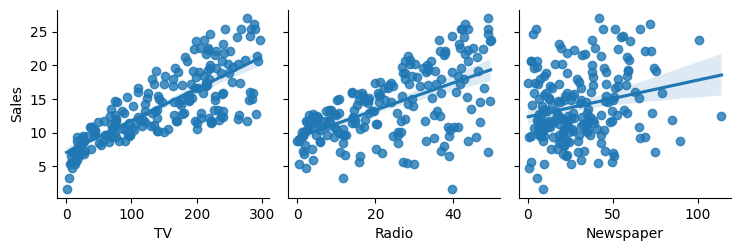

In [5]:
import seaborn as sns

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], 
             y_vars='Sales', kind='reg', palette=sns.color_palette('rocket'))


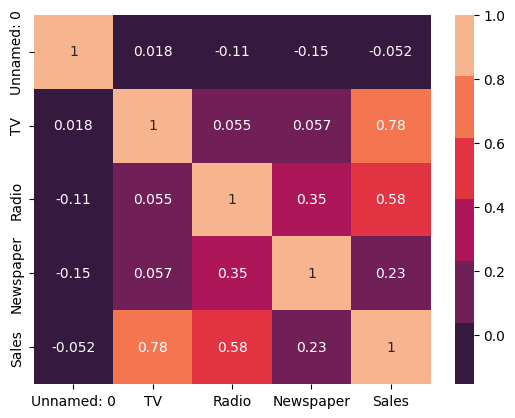

In [6]:
# Create a correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=sns.color_palette('rocket'))
plt.show()


### Interpretation
- "Sales" has a strong positive correlation with "TV" (0.78), suggesting that as TV advertising spending increases, sales also tend to increase.
- There's a moderate positive correlation between "Sales" and "Radio" (0.58).
- The correlation between "Sales" and "Newspaper" is positive but weaker (0.23).

## Training
In this section, we'll prepare our data for training the linear regression model. We'll select the features and target variable and split the data into training and testing sets.

In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

Split the Data into Training and Testing Sets:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the Linear Regression Model:

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Testing and Evaluation

This section involves making predictions using our trained linear regression model on the test set and evaluating its performance. We'll calculate metrics such as Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error to assess the accuracy of our predictions.

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
Root Mean Squared Error: 1.78159966153345


 With MAE of 1.4608, MSE of 3.1741, and RMSE of 1.7816, these metrics suggest that our model is providing reasonably accurate predictions. A lower MAE and RMSE indicate better accuracy, while MSE gives an overall measure of prediction errors. These results imply that our model is effective in predicting sales based on advertising spending.

## Visualize the predicted values against the actual values

Text(0.5, 1.0, 'Actual Sales vs Predicted Sales')

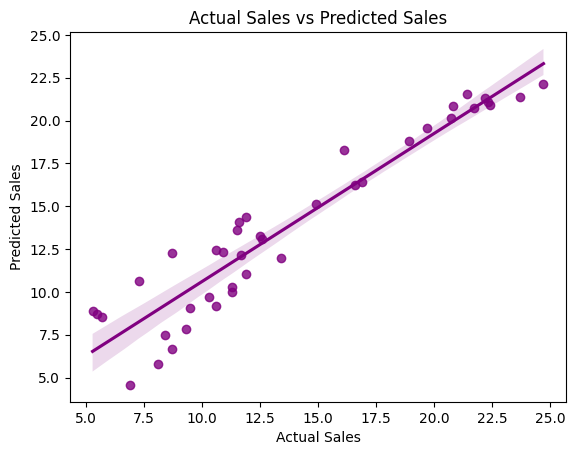

In [11]:
sns.regplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs Predicted Sales")

### Interpretation
The scatter plot offers a visual representation of how well our model predictions align with the actual sales values. The spread of points indicates a positive correlation, which indicates that our model able to capture the underlying patterns in the data. The relatively tight clustering around the diagonal line implies that the predicted sales values closely match the actual sales.